In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox


In [2]:
pd.options.display.max_columns = None
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('final_df.csv')

In [ ]:
df.head()

In [ ]:
df.columns

In [4]:
df  = df.drop(columns=['Unnamed: 0'])

In [5]:
df.to_csv('final_df.csv')

In [6]:
def plot_num(to_plot, title):
    # Select the relevant columns from the DataFrame
    df_num_to_plot = df[to_plot]

    # Determine the number of subplots needed
    num_vars = len(to_plot)
    cols = 3  # Number of columns in the subplot grid
    rows = (num_vars + cols - 1) // cols  # Ceiling division to determine rows

    # Create subplots
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(5 * cols, 3 * rows))

    # Flatten axes array for easy iteration in case of single row/column
    axes = axes.flatten() if num_vars > 1 else [axes]

    # Plot each variable
    for i, var in enumerate(df_num_to_plot.columns):
        df_num_to_plot[var].plot(kind="kde", ax=axes[i])
        axes[i].set_title(var)
        axes[i].grid(True)  # Optional: Add grid for better readability

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(title, fontsize=16)  # Adjust font size as needed

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Adjust the top to fit the suptitle
    plt.show()


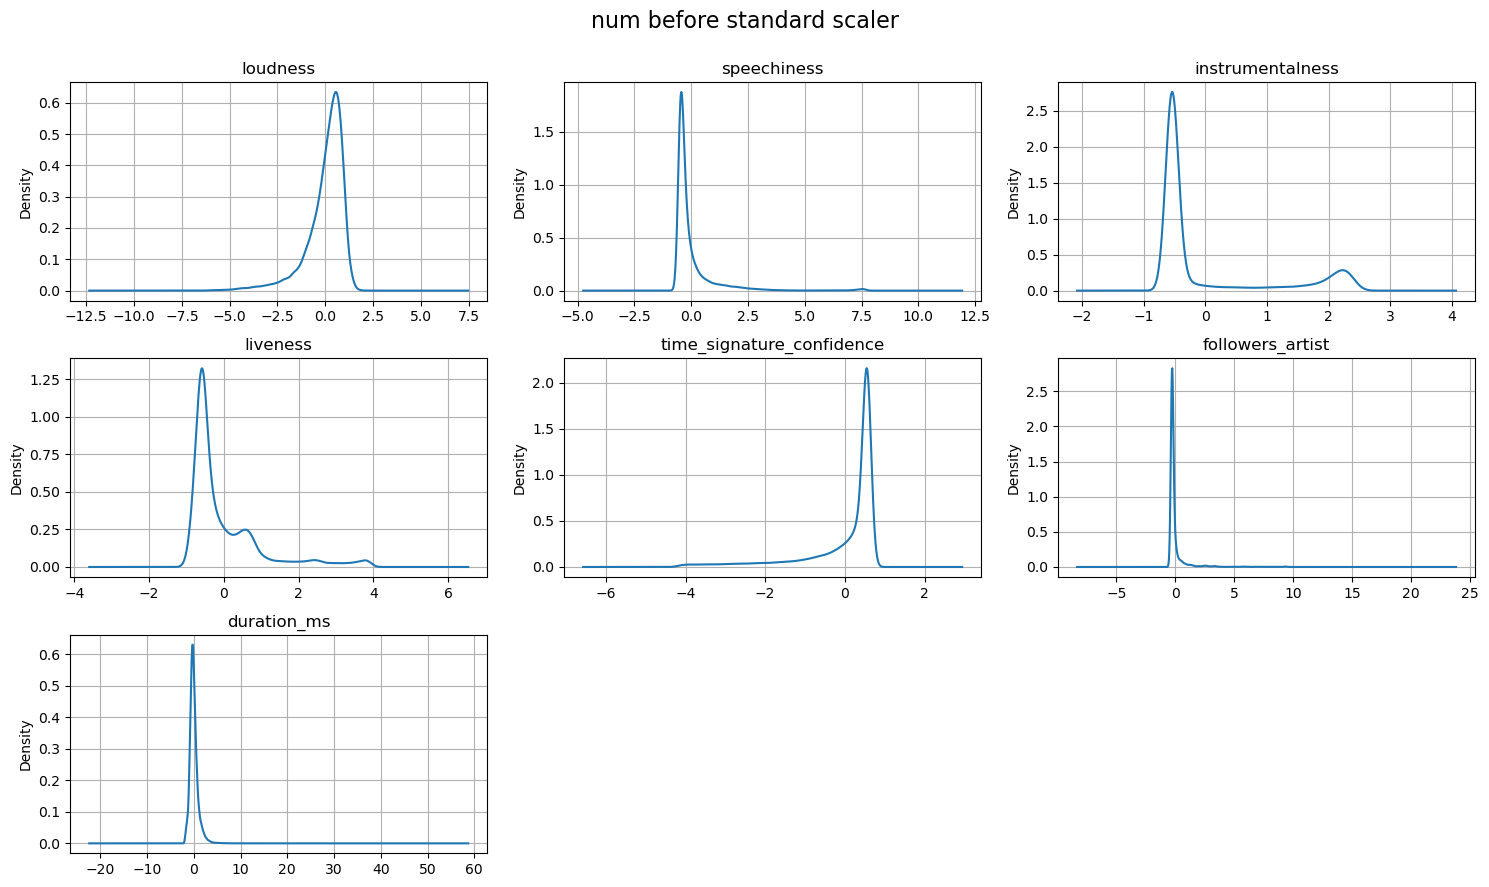

In [20]:
to_plot = ['loudness', 'speechiness', 'instrumentalness', 'liveness', 
     'time_signature_confidence', 'followers_artist', 'duration_ms']

plot_num(to_plot, "num before standard scaler")

In [17]:

num =['duration_ms', 'popularity', 'danceability', 'energy',
        'loudness',  'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 
       'tempo_confidence', 'time_signature_confidence', 'key_confidence',
       'mode_confidence', 'popularity_artist','followers_artist']



cat = ['explicit', 'key','mode','time_signature','genre', 'mood' ]


In [18]:
df_num = df[num]

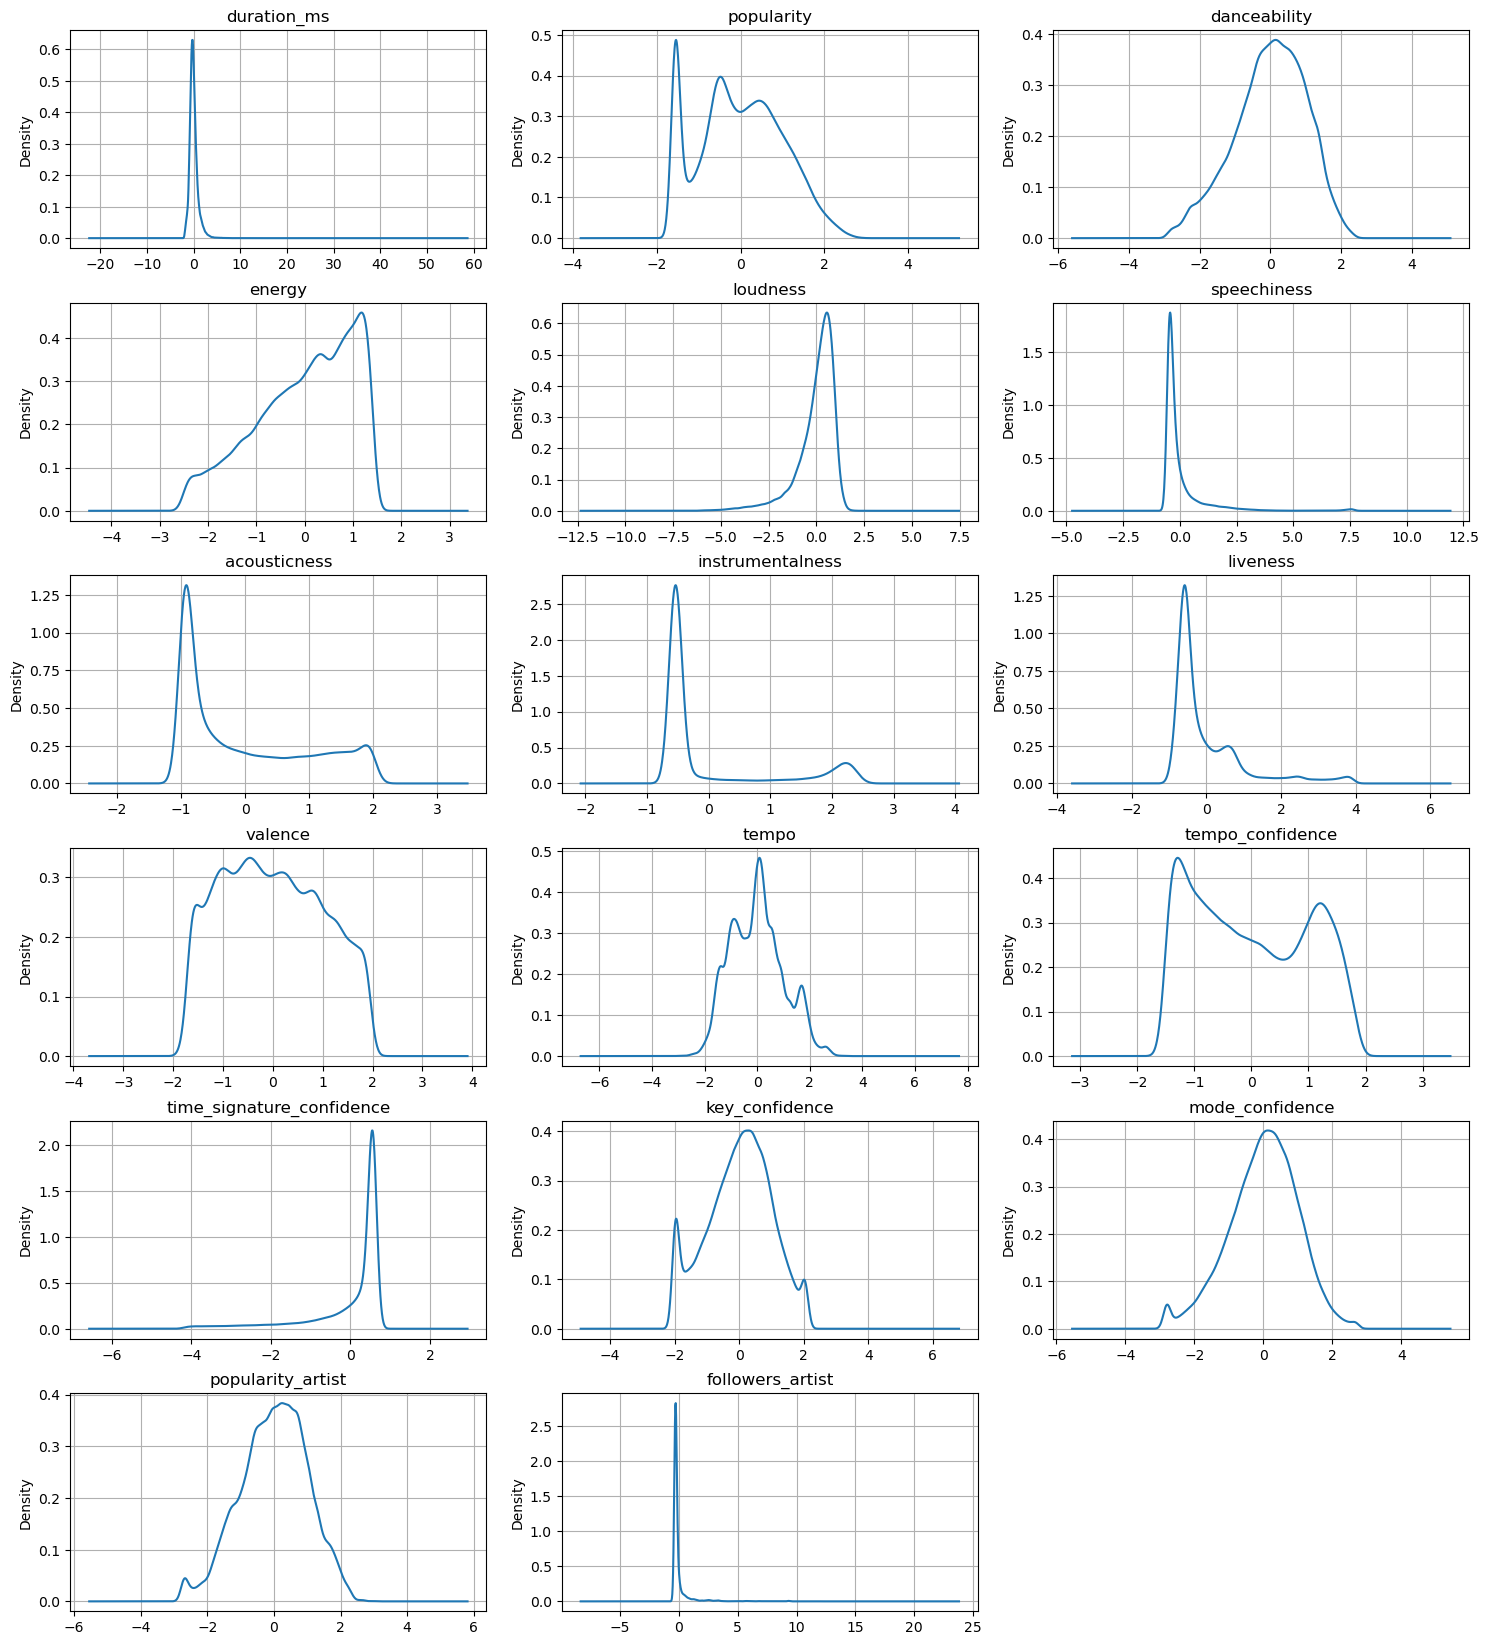

In [12]:
plot_num(num, "")

duration_speechiness_loudness

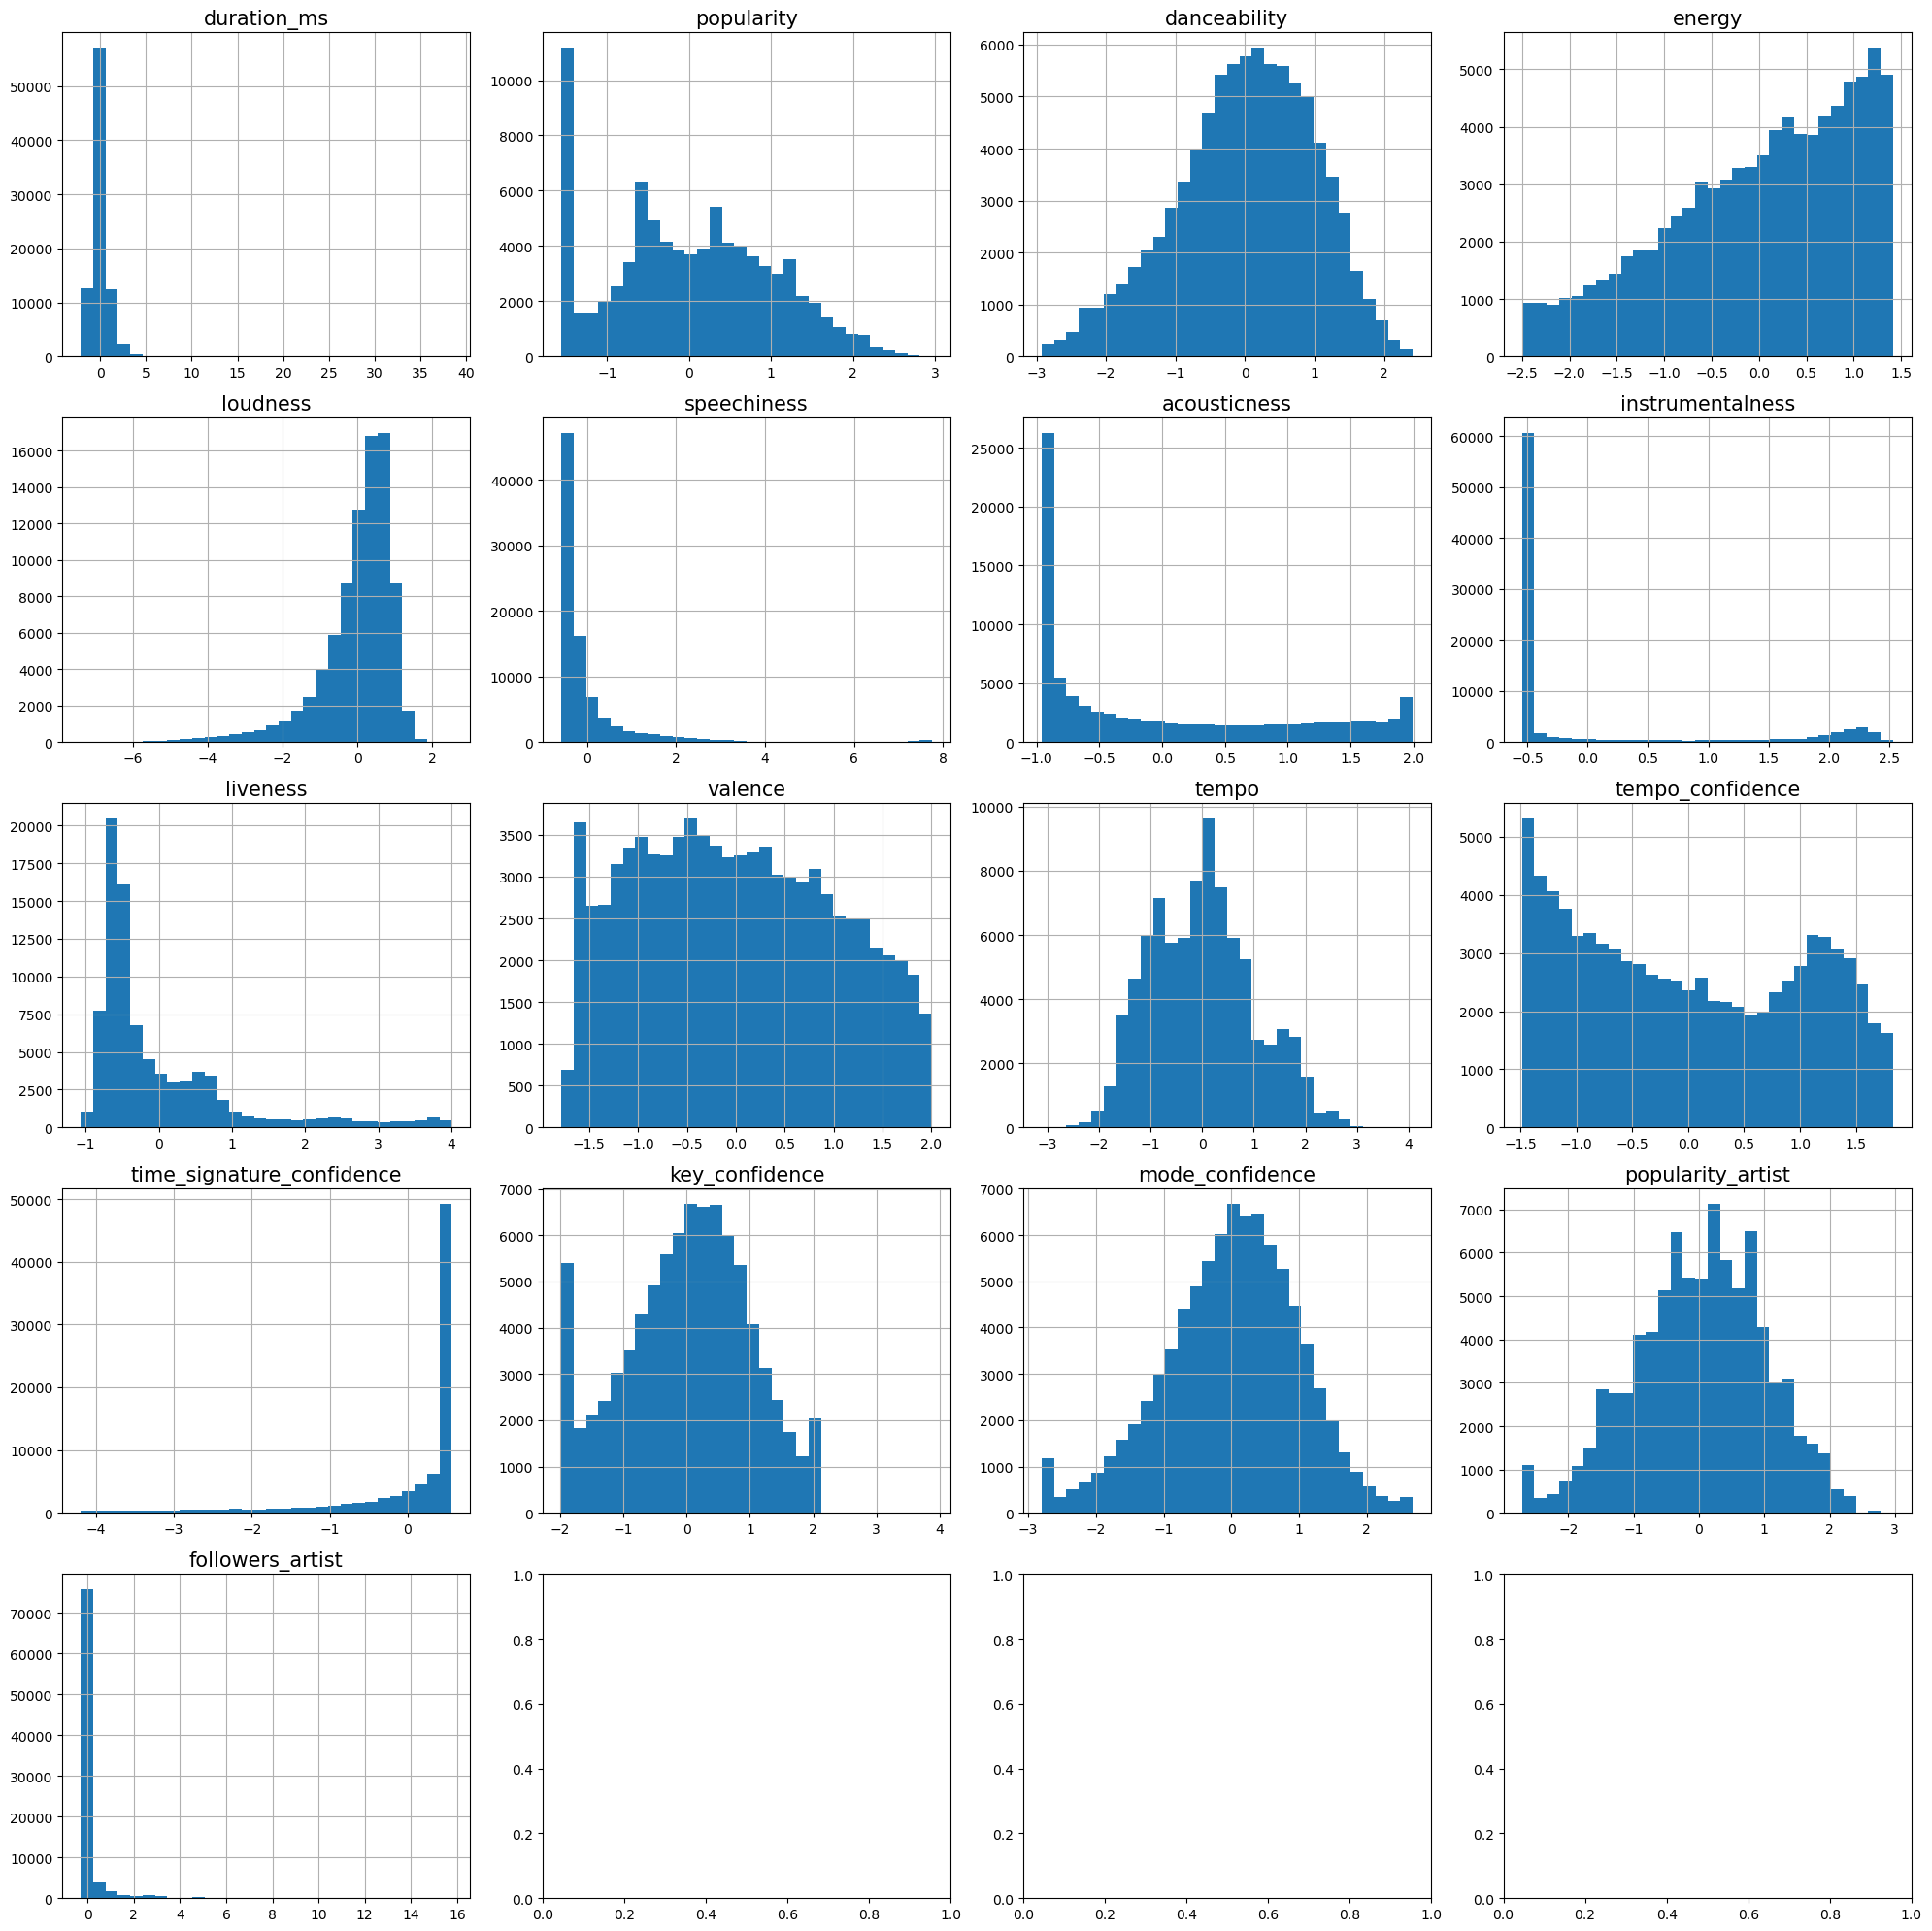

In [13]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20,20))

for i, var in enumerate(df_num.columns):
    row = i // 4
    col = i % 4
    df[var].hist(bins=30, ax=axes[row][col])
    axes[row][col].set_title(var, fontsize=15)
    
plt.tight_layout()
plt.show()


In [28]:
df[num].columns

Index(['duration_ms', 'popularity', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'tempo_confidence', 'time_signature_confidence',
       'key_confidence', 'mode_confidence', 'popularity_artist',
       'followers_artist'],
      dtype='object')

In [29]:


columns_to_scale = df[num]
columns_to_keep = df[cat]

scaler = StandardScaler()

scaler.fit(columns_to_scale) 
train_scaled = scaler.transform(columns_to_scale)

# Concatenate the scaled columns and the columns to be kept
df = pd.concat([pd.DataFrame(train_scaled, columns= columns_to_scale.columns), columns_to_keep], axis=1)

In [30]:
print(len(num))
print(len(cat))
print(df.shape)

17
6
(85046, 23)


In [31]:
print(len(to_plot))

7


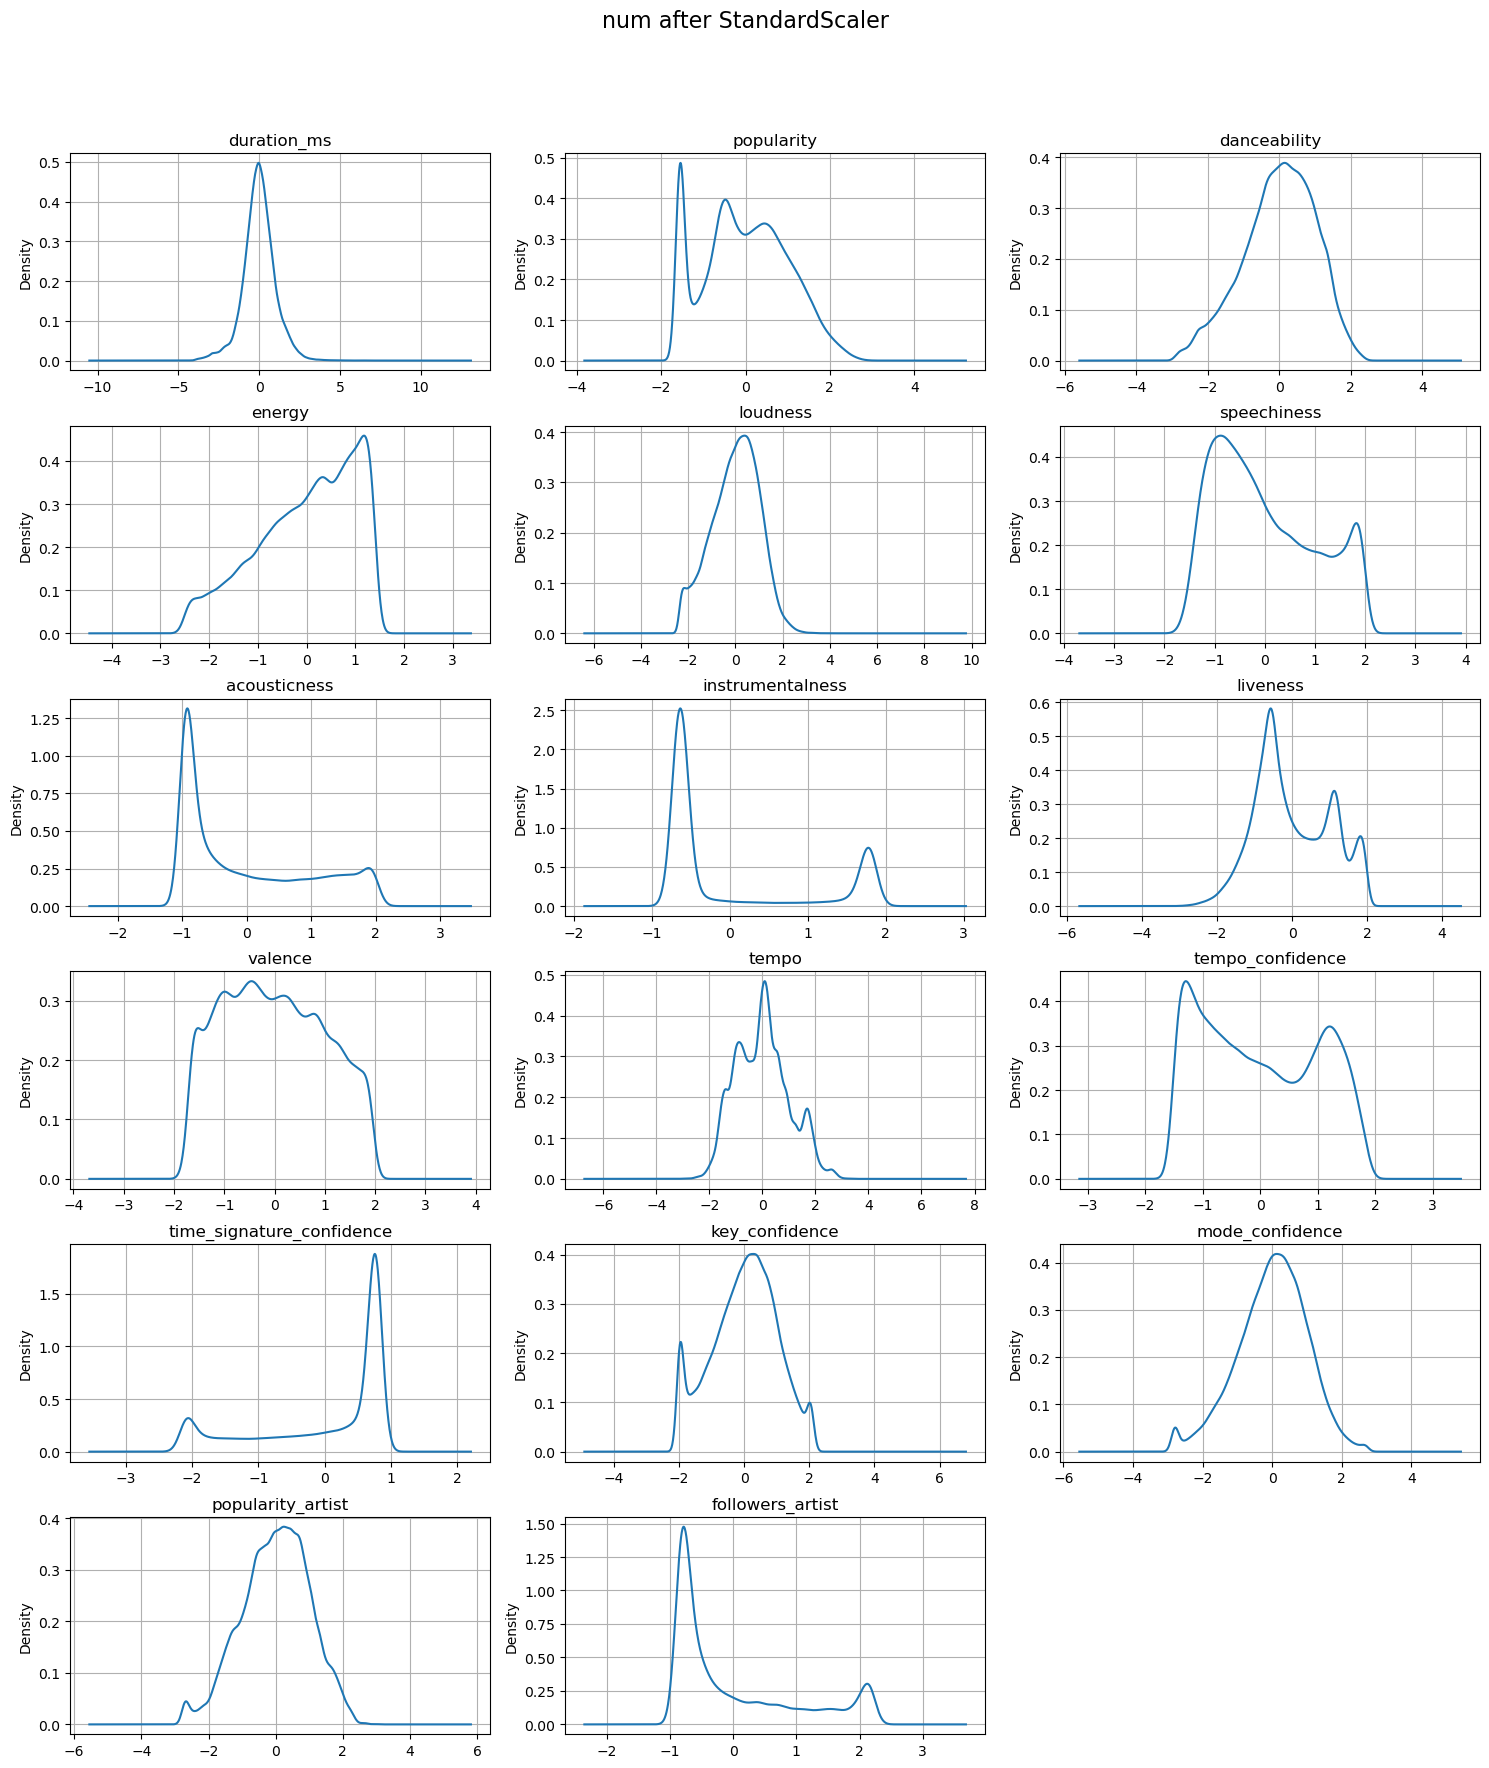

In [32]:
plot_num(num, "num after StandardScaler")

In [ ]:
df.describe()

In [19]:
to_plot

NameError: name 'to_plot' is not defined

In [33]:

# Assume df è il tuo DataFrame con le variabili
# to_transf è la lista delle colonne da trasformare

# Effettua la trasformazione Box-Cox per ogni variabile nella lista
for col in to_plot:
    # Assicurati che non ci siano valori negativi
    if (df[col] <= 0).any():
        # Shifta i valori per renderli tutti positivi
        df[col] += abs(df[col].min()) + 1

# Applica la trasformazione Box-Cox
for col in to_plot:
    df[col], _ = boxcox(df[col])

# Ora le variabili nel DataFrame sono trasformate usando Box-Cox


In [26]:
plot_num(to_plot, )

TypeError: plot_num() missing 1 required positional argument: 'title'

In [35]:
df.to_csv('/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/Notebooks/final_df_standard_scaler_box_cox.csv')

In [36]:
df_final = pd.read_csv('/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/Notebooks/final_df_standard_scaler_box_cox.csv')

In [37]:
df_final_num = df[num]

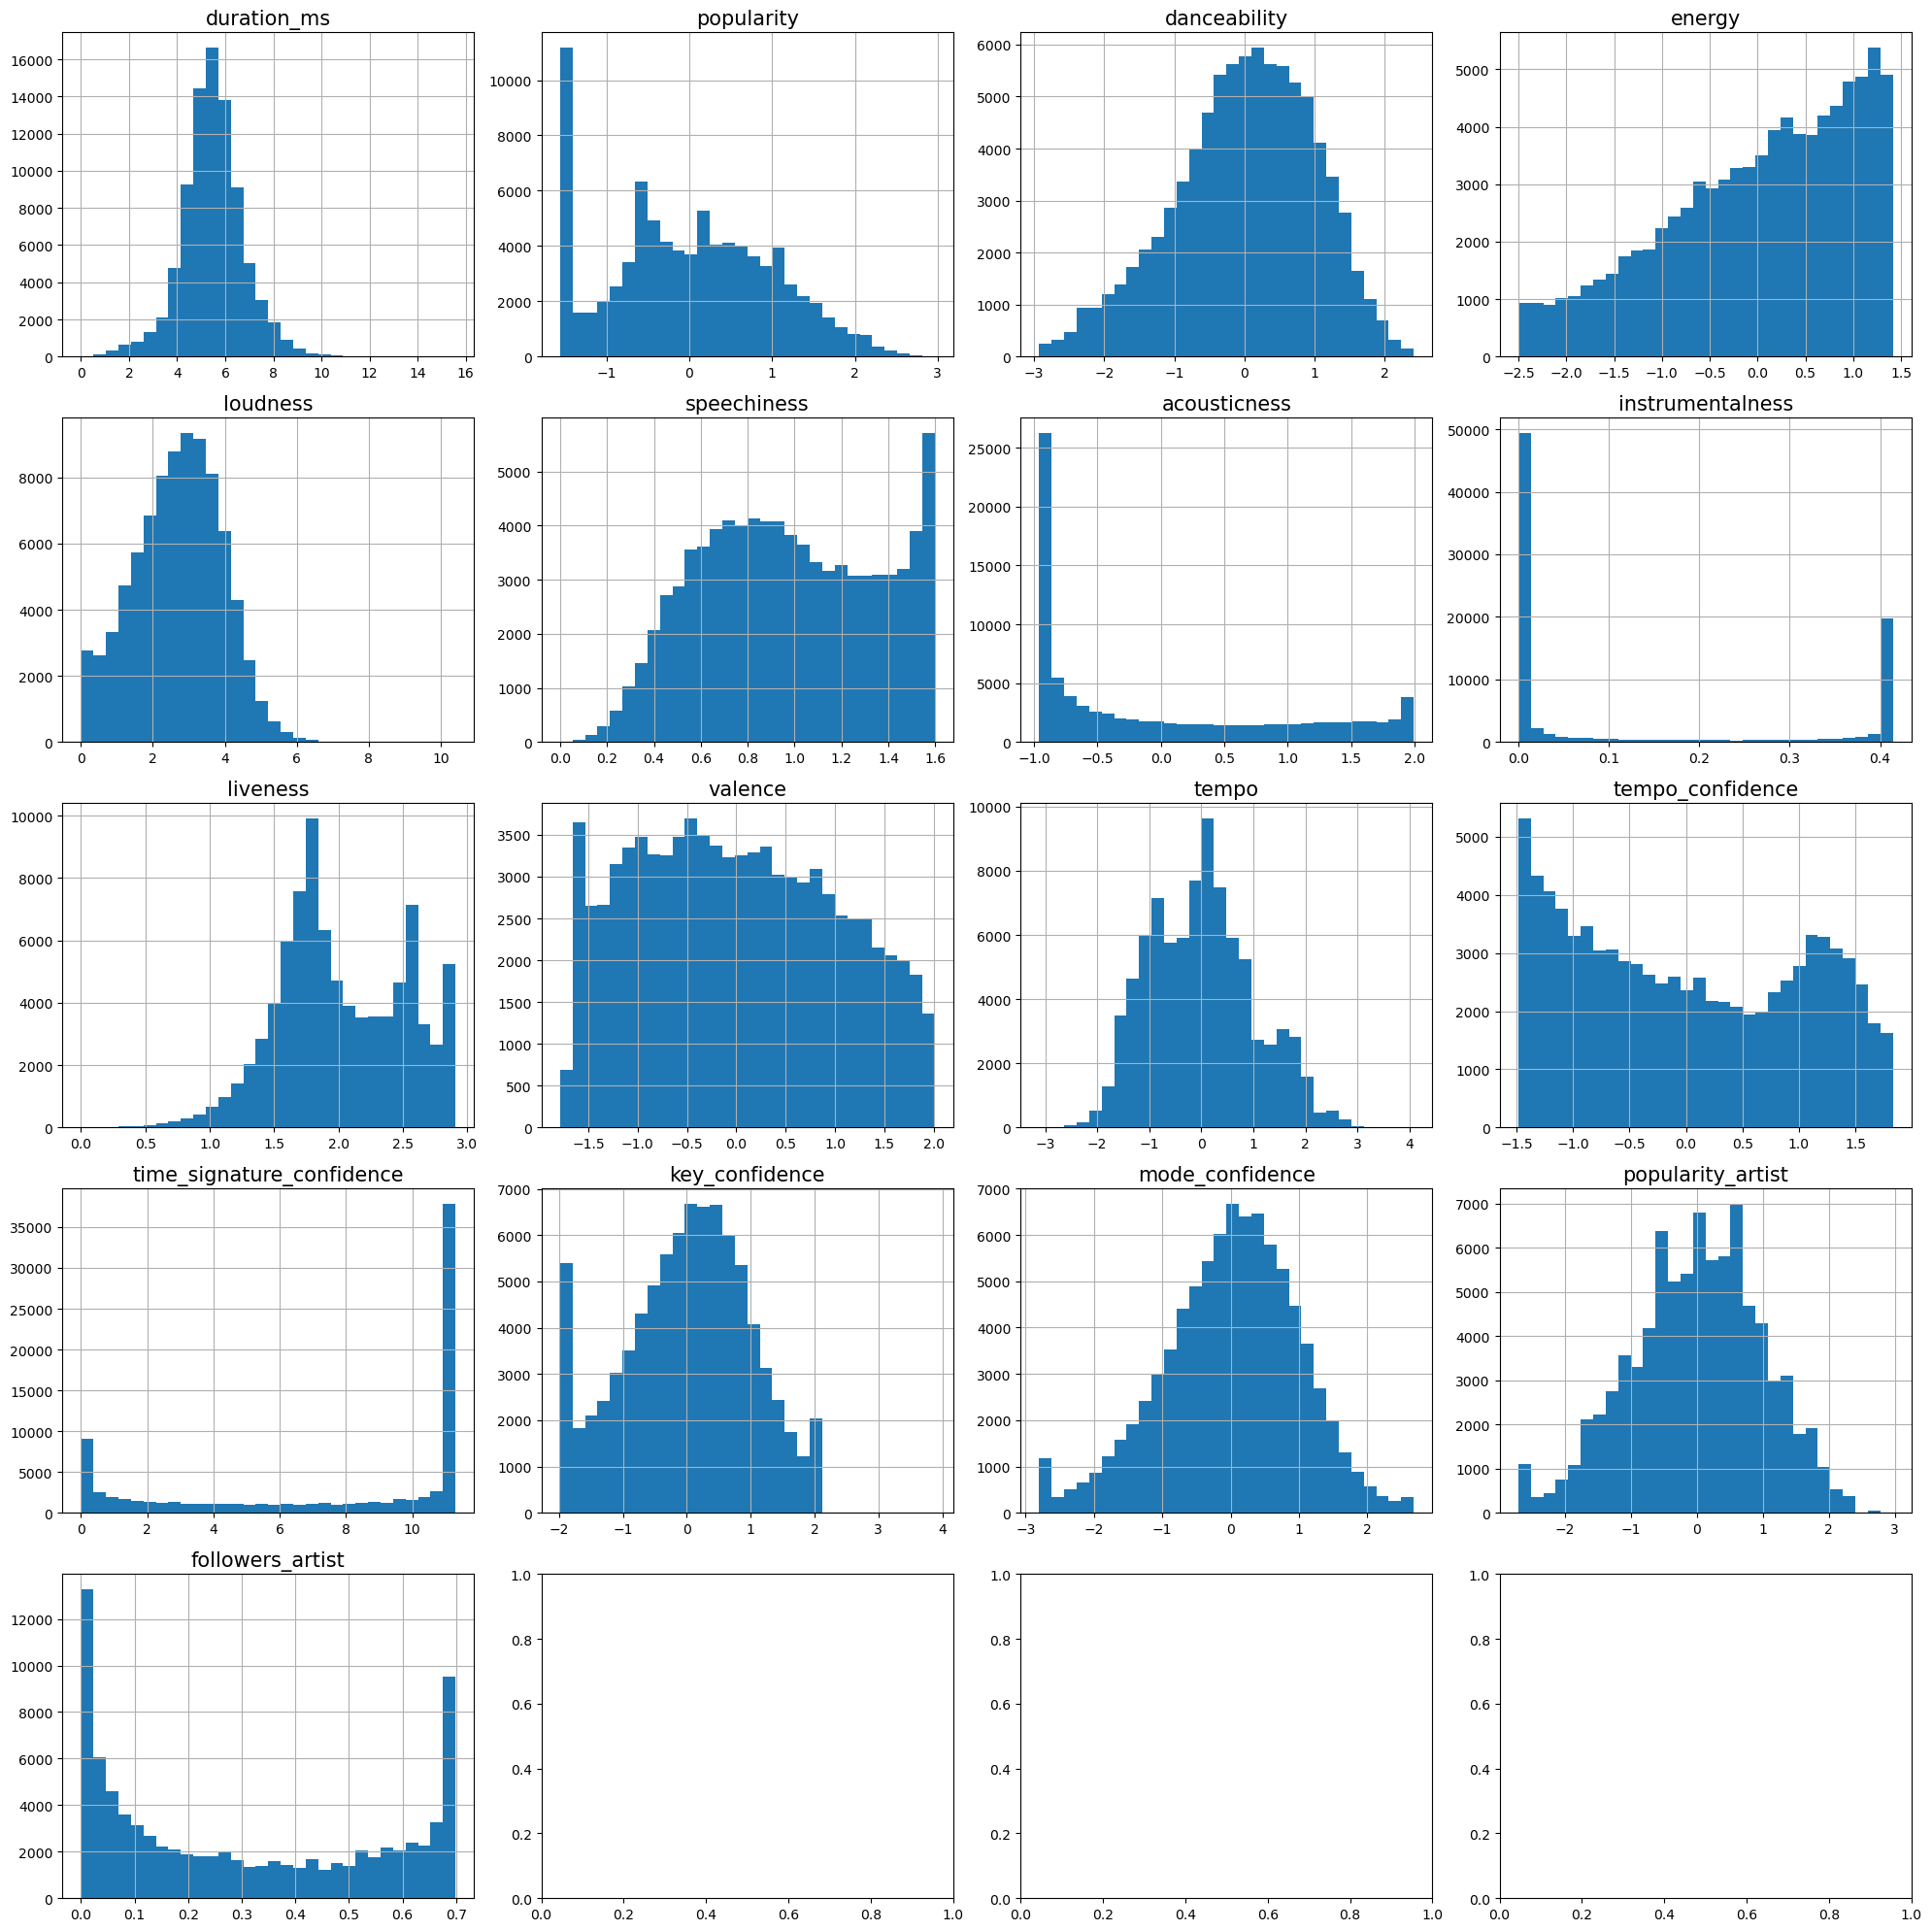

In [38]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20,20))

for i, var in enumerate(df_num.columns):
    row = i // 4
    col = i % 4
    df[var].hist(bins=30, ax=axes[row][col])
    axes[row][col].set_title(var, fontsize=15)
    
plt.tight_layout()
plt.show()
